## Observations and Insights 

## Observations:
1. Upon initial analysis of the final tumor volume, use of Capomulin in the mice appears to indicate a greater reduction in tumor volume than other treatments, with the exception of Ramicane. 
2. For a single Capomulin mouse, records would indicate that a reduction in tumor volume did occur after the administration of Capomulin.  Further time series plots should be created to see if this trend holds across a significant portion of mice in the study. 
3. There does appear to be a strong correlation between the mouse weight and the tumor volume. This may be expected: as the tumor decreases in size, its weight and therefore the weight of the mouse will also be impacted. 
4. In regards to Pymaceutical's interest in Capomulin, Capomulin may be a more effective treatment than many on the market, and may be a worthy competitor for Ramicane.



In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [192]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [129]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
#see below for printout of duplicate mouse details

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [130]:
# Optional: Get all the data for the duplicate mouse ID. 
#find duplicates: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicate_id = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [134]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')

In [132]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_tumor_df = clean_df.groupby(by = "Drug Regimen")["Tumor Volume (mm3)"]

reg_mean = regimen_tumor_df.mean()
reg_mean_df = reg_mean.to_frame(name = "Mean")

reg_median = regimen_tumor_df.median()
reg_median_df = reg_median.to_frame(name = "Median")

reg_variance = regimen_tumor_df.var()
reg_variance_df = reg_variance.to_frame(name = "Variance")

reg_std = regimen_tumor_df.std()
reg_std_df = reg_std.to_frame(name = "Standard Deviation")

reg_sem = regimen_tumor_df.sem()
reg_sem_df = reg_sem.to_frame(name = "SEM")


# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.concat([reg_mean_df, reg_median_df, reg_variance_df, reg_std_df, reg_sem_df], axis = 1)
summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# My tutor taught me the agg() function

# This method produces everything in a single groupby function
regimen_tumor_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
regimen_tumor_df




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

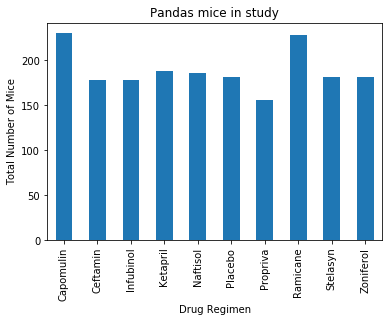

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = clean_df.groupby(by = "Drug Regimen")["Mouse ID"].count()
mouse_bar = mouse_count.plot(kind = 'bar', title="Pandas mice in study")
mouse_bar.set_ylabel("Total Number of Mice")
mouse_bar.set_xlabel("Drug Regimen")
plt.show()


In [121]:
clean_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

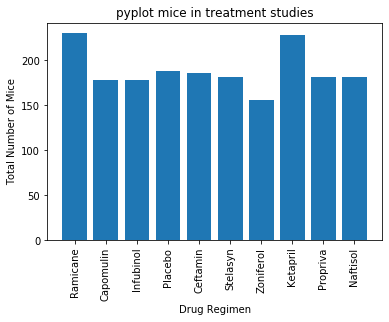

In [122]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_regimen = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

plt.bar(drug_regimen,mouse_count) 
  
plt.xlabel("Drug Regimen") 
plt.ylabel("Total Number of Mice") 
plt.title("pyplot mice in treatment studies") 
plt.xticks(rotation=90)

plt.show() 


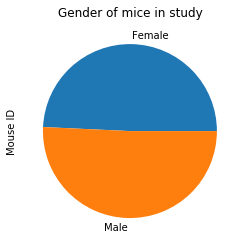

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = clean_df.groupby(by = "Sex")['Mouse ID'].count()
mouse_pie = mouse_gender.plot(kind = 'pie', title="Gender of mice in study")

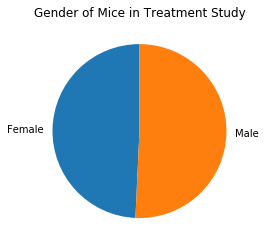

In [246]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_gender, labels = ["Female","Male"], startangle = 90)
plt.title("Gender of Mice in Treatment Study") 
plt.show()

## Quartiles, Outliers and Boxplots

In [201]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
   
# # Start by getting the last (greatest) timepoint for each mouse
max_tumor_time = clean_df.groupby(by = "Mouse ID")["Timepoint"].max()
max_tumor_df = max_tumor_time.reset_index()


# # # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_tumor_df, on=['Mouse ID','Timepoint'])
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [268]:
# Put treatments into a list for for loop (and later for plot labels)

# # Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

for drug in drug_regimens:
    filters = merged_df['Drug Regimen'] == drug   
    filter_drug = merged_df[filters]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol.append(filter_drug["Tumor Volume (mm3)"]) 
       



In [203]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

lowerq = np.quantile(tum_vol, 0.25)
upperq = np.quantile(tum_vol, 0.75)
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.") 

Values below 3.074 could be outliers.
Values above 94.044 could be outliers.


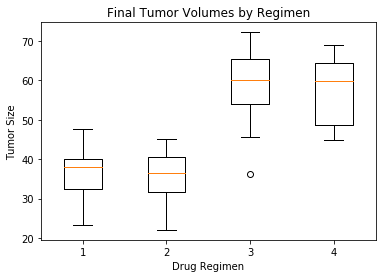

In [272]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# xtick_labels = ["Capomulin", 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes by Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(tum_vol)
plt.show()


## Line and Scatter Plots

In [185]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_table = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_mouse = cap_table.loc[cap_table["Mouse ID"] == "s185"]
cap_mouse

# printed cap_table to find mouse ID s185 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


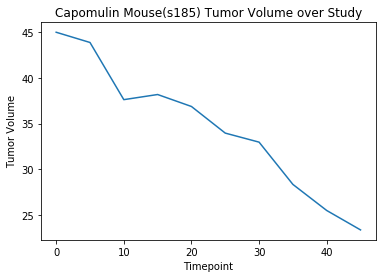

In [207]:
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Capomulin Mouse(s185) Tumor Volume over Study')
plt.show()

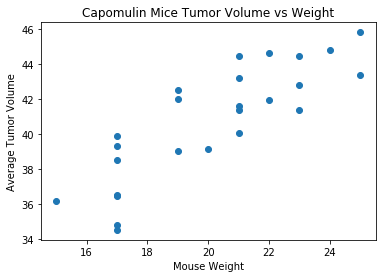

In [241]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_table_gr = (clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]).groupby("Mouse ID")
# plt.scatter(cap_table_gr['Weight (g)'].mean(),cap_table_gr['Tumor Volume (mm3)'].mean() )
# 

cap_weight = cap_table.groupby("Mouse ID")['Weight (g)'].mean()
cap_tumor = cap_table.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
plt.scatter(cap_weight, cap_tumor)
plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Capomulin Mice Tumor Volume vs Weight')
plt.show()



## Correlation and Regression

In [188]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
correlation = sem.pearsonr(cap_weight,cap_tumor)
print(f"The correlation between mouse weight and tumor size is  {round(correlation[0],2)}")

The correlation between mouse weight and tumor size is  0.84


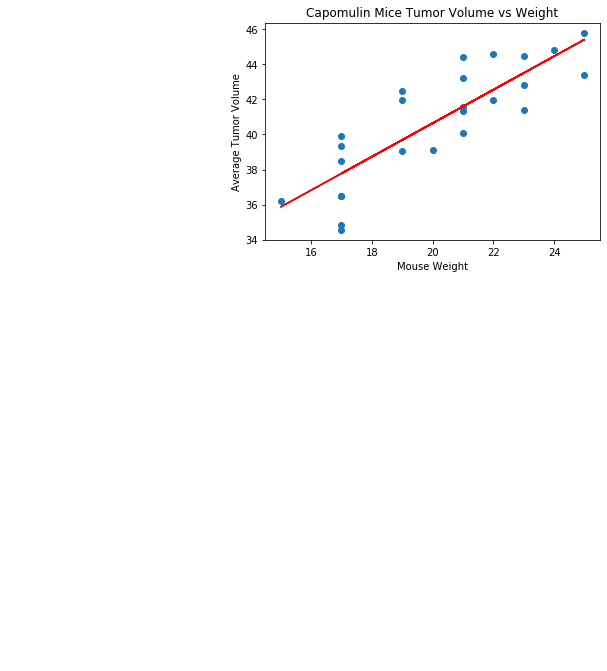

In [276]:
#linear regression model
x_values = cap_weight
y_values = cap_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red",label="line_eq")
plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Capomulin Mice Tumor Volume vs Weight')
plt.show()